In [4]:
import pandas as pd

data = []
with open('Airlines.arff', "r") as f:
    for line in f:
        line = line.replace('\n', '')
        data.append(line.split(','))

names = ['DayofWeek', 'CRSDepTime', 'UniqueCarrier', 'FlightNum', 'Origin', 'Dest', 'ArrDelay']
    
df = pd.DataFrame(data[11:], columns=names) #data tuples begin from line 12 of the arff file

In [5]:
df

,DayofWeek,CRSDepTime,UniqueCarrier,FlightNum,Origin,Dest,ArrDelay
0,5,600,UA,899.0,ORD,IAD,-3
1,5,615,DL,357.0,IAD,ATL,5
2,5,615,UA,341.0,IAD,DEN,8
3,5,625,CO,581.0,IAD,DEN,44
4,5,630,UA,902.0,CLE,IAD,-10
...,...,...,...,...,...,...,...
100156,6,2140,UA,30.0,LAX,IAD,-19
100157,6,2140,CO,896.0,LAX,IAD,-23
100158,6,2150,UA,1094.0,IAD,BDL,-14
100159,6,2155,US,394.0,PIT,IAD,9


In [6]:
df.shape #check number of records and number of features

(100161, 7)

In [7]:
df.dtypes #check data types

DayofWeek        object
CRSDepTime       object
UniqueCarrier    object
FlightNum        object
Origin           object
Dest             object
ArrDelay         object
dtype: object

In [8]:
#convert numerical features
df['DayofWeek'] = pd.to_numeric(df['DayofWeek'])
df['CRSDepTime'] = pd.to_numeric(df['CRSDepTime'])
df['ArrDelay'] = pd.to_numeric(df['ArrDelay'])

In [9]:
df.dtypes #check data types after conversion

DayofWeek         int64
CRSDepTime        int64
UniqueCarrier    object
FlightNum        object
Origin           object
Dest             object
ArrDelay          int64
dtype: object

In [10]:
carr = df.groupby(['UniqueCarrier'])['ArrDelay'].mean().sort_values(ascending= False)
print(carr)
print('\n',carr.shape)

UniqueCarrier
'PA (1)'    16.223642
EA          11.728169
US           6.246798
TW           5.179647
DL           5.118715
NW           5.004890
CO           4.919948
UA           4.569664
AA           1.908237
Name: ArrDelay, dtype: float64

 (9,)


In [11]:
origin = df.groupby(['Origin'])['ArrDelay'].mean().sort_values(ascending= False)
print(origin.head(10))
print('\n',origin.shape)

Origin
SJU    18.194946
RIC    13.000000
PVD    12.334459
HPN    12.171053
MHT    11.199105
MDT    11.000000
ORD    10.605521
BOS     9.550679
PWM     8.491749
STL     7.804878
Name: ArrDelay, dtype: float64

 (58,)


In [12]:
dest = df.groupby(['Dest'])['ArrDelay'].mean().sort_values(ascending= False)
print(dest.head(10))
print('\n',dest.shape)

Dest
MDT    21.000000
FLL    14.638554
MDW    11.873016
CHS    11.830153
PBI    11.072857
JFK     9.690909
MCO     9.545346
HOU     8.954545
BOS     8.570847
EWR     8.528418
Name: ArrDelay, dtype: float64

 (59,)


<AxesSubplot:xlabel='UniqueCarrier', ylabel='count'>

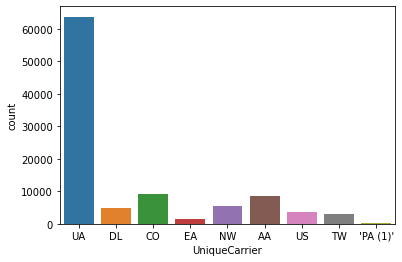

In [13]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.countplot(df['UniqueCarrier'])

<AxesSubplot:xlabel='ArrDelay', ylabel='Density'>

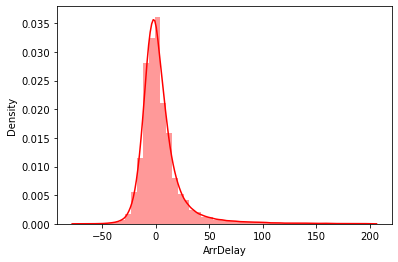

In [14]:
import matplotlib.pyplot as plt

for_distplot = df.drop(df[df['ArrDelay'] > 200].index)
sns.distplot(for_distplot['ArrDelay'], color = "r")

In [15]:
df['ArrDelay'] = df['ArrDelay'].apply(lambda x : 1 if x > 0 else 0)
df

,DayofWeek,CRSDepTime,UniqueCarrier,FlightNum,Origin,Dest,ArrDelay
0,5,600,UA,899.0,ORD,IAD,0
1,5,615,DL,357.0,IAD,ATL,1
2,5,615,UA,341.0,IAD,DEN,1
3,5,625,CO,581.0,IAD,DEN,1
4,5,630,UA,902.0,CLE,IAD,0
...,...,...,...,...,...,...,...
100156,6,2140,UA,30.0,LAX,IAD,0
100157,6,2140,CO,896.0,LAX,IAD,0
100158,6,2150,UA,1094.0,IAD,BDL,0
100159,6,2155,US,394.0,PIT,IAD,1


In [16]:
onehot = df[['Origin','Dest','ArrDelay']]
one_hot_table = pd.get_dummies(onehot)

In [17]:
one_hot_table

,ArrDelay,Origin_ATL,Origin_BDL,Origin_BNA,Origin_BOS,Origin_BTV,Origin_BUF,Origin_BWI,Origin_CAE,Origin_CHS,...,Dest_SAV,Dest_SDF,Dest_SEA,Dest_SFO,Dest_SJU,Dest_SLC,Dest_SRQ,Dest_STL,Dest_SYR,Dest_TPA
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100158,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100159,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
from mlxtend.frequent_patterns import apriori, association_rules
a_pr = apriori(one_hot_table, min_support = 0.2, use_colnames = True, verbose = 1)
a_pr

Processing 3 combinations | Sampling itemset size 3


,support,itemsets
0,0.486087,(ArrDelay)
1,0.501483,(Origin_IAD)
2,0.498517,(Dest_IAD)
3,0.252863,"(ArrDelay, Origin_IAD)"
4,0.233225,"(ArrDelay, Dest_IAD)"


In [19]:
ass_rules = association_rules(a_pr, metric = "confidence", min_threshold = 0.2)
ass_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ArrDelay),(Origin_IAD),0.486087,0.501483,0.252863,0.520200,1.037325,0.009099,1.039012
1,(Origin_IAD),(ArrDelay),0.501483,0.486087,0.252863,0.504231,1.037325,0.009099,1.036596
2,(ArrDelay),(Dest_IAD),0.486087,0.498517,0.233225,0.479800,0.962453,-0.009099,0.964018
3,(Dest_IAD),(ArrDelay),0.498517,0.486087,0.233225,0.467836,0.962453,-0.009099,0.965704


In [20]:
onehot = df.reset_index()[['Origin', 'Dest', 'ArrDelay']].values.tolist()
onehot

[['ORD', 'IAD', 0],
 ['IAD', 'ATL', 1],
 ['IAD', 'DEN', 1],
 ['IAD', 'DEN', 1],
 ['CLE', 'IAD', 0],
 ['CLE', 'IAD', 0],
 ['EWR', 'IAD', 0],
 ['IAD', 'RIC', 1],
 ['DTW', 'IAD', 0],
 ['BOS', 'IAD', 0],
 ['LGA', 'IAD', 0],
 ['CAE', 'IAD', 0],
 ['BOS', 'IAD', 1],
 ['IAD', 'LGA', 0],
 ['BDL', 'IAD', 0],
 ['IAD', 'ATL', 1],
 ['ISP', 'IAD', 1],
 ['IAD', 'MSP', 1],
 ['TPA', 'IAD', 0],
 ['FLL', 'IAD', 0],
 ['RSW', 'IAD', 0],
 ['IAD', 'ORD', 1],
 ['BUF', 'IAD', 0],
 ['FLL', 'IAD', 0],
 ['ROC', 'IAD', 0],
 ['IAD', 'DTW', 0],
 ['MCO', 'IAD', 0],
 ['JAX', 'IAD', 0],
 ['PBI', 'IAD', 0],
 ['GSO', 'IAD', 0],
 ['TPA', 'IAD', 1],
 ['IAD', 'EWR', 0],
 ['IAD', 'SLC', 1],
 ['IAH', 'IAD', 0],
 ['IAD', 'PIT', 0],
 ['IAD', 'ORD', 1],
 ['IAD', 'BOS', 0],
 ['DEN', 'IAD', 0],
 ['IAD', 'SJU', 0],
 ['IAD', 'CLE', 1],
 ['CHS', 'IAD', 0],
 ['IAD', 'DFW', 1],
 ['ORD', 'IAD', 1],
 ['SFO', 'IAD', 0],
 ['IAD', 'LGA', 0],
 ['IAD', 'LAX', 1],
 ['DFW', 'IAD', 0],
 ['SFO', 'IAD', 0],
 ['IAD', 'BDL', 0],
 ['EWR', 'IAD', 0],


In [21]:
from collections import defaultdict
from itertools import chain, combinations
from optparse import OptionParser


def apriori(itemSetList, minSup, minConf):
    
    # Get the Candidates of level 1
    C1ItemSet = getItemSetFromList(itemSetList)
    
    # Final result 
    globalFreqItemSet = dict()
    
    # Storing global itemset with support count
    globalItemSetWithSup = defaultdict(int)

    # Get the L1 itemsets
    L1ItemSet = getAboveMinSup(
        C1ItemSet, itemSetList, minSup, globalItemSetWithSup)
    
    # Continue for k=2 itemsets and above..
    currentLSet = L1ItemSet
    k = 2

    # Calculating frequent item set
    while(currentLSet):
        # Storing frequent itemset
        globalFreqItemSet[k-1] = currentLSet
        # Self-joining Lk
        candidateSet = getUnion(currentLSet, k)
        # Perform subset testing and remove pruned supersets
        candidateSet = pruning(candidateSet, currentLSet, k-1)
        # Scanning itemSet for counting support
        currentLSet = getAboveMinSup(
            candidateSet, itemSetList, minSup, globalItemSetWithSup)
        k += 1

    rules = associationRule(globalFreqItemSet, globalItemSetWithSup, minConf)
    rules.sort(key=lambda x: x[2])

    return globalFreqItemSet, rules


def getItemSetFromList(itemSetList):
    tempItemSet = set()

    for itemSet in itemSetList:
        for item in itemSet:
            tempItemSet.add(frozenset([item]))

    return tempItemSet


def getAboveMinSup(itemSet, itemSetList, minSup, globalItemSetWithSup):
    freqItemSet = set()
    localItemSetWithSup = defaultdict(int)

    for item in itemSet:
        for itemSet in itemSetList:
            if item.issubset(itemSet):
                globalItemSetWithSup[item] += 1
                localItemSetWithSup[item] += 1

    for item, supCount in localItemSetWithSup.items():
        support = float(supCount / len(itemSetList))
        if(support >= minSup):
            freqItemSet.add(item)

    return freqItemSet


def getUnion(itemSet, length):
    return set([i.union(j) for i in itemSet for j in itemSet if len(i.union(j)) == length])


def pruning(candidateSet, prevFreqSet, length):
    tempCandidateSet = candidateSet.copy()
    for item in candidateSet:
        subsets = combinations(item, length)
        for subset in subsets:
            # if the subset is not in previous K-frequent get, then remove the set
            if(frozenset(subset) not in prevFreqSet):
                tempCandidateSet.remove(item)
                break
    return tempCandidateSet


def associationRule(freqItemSet, itemSetWithSup, minConf):
    rules = []
    for k, itemSet in freqItemSet.items():
        for item in itemSet:
            subsets = powerset(item)
            for s in subsets:
                confidence = float(
                    itemSetWithSup[item] / itemSetWithSup[frozenset(s)])
                if(confidence > minConf):
                    rules.append([set(s), set(item.difference(s)), confidence])
    return rules


def powerset(s):
    return chain.from_iterable(combinations(s, r) for r in range(1, len(s)))

In [22]:
freqItemSet, rules = apriori(onehot, minSup=0.2, minConf=0.2)

In [23]:
# Print the frequent itemsets
for key in freqItemSet:
    values = [list(x) for x in freqItemSet[key]]
    print(f'{key}: {values}')

1: [[1], ['IAD'], [0]]
2: [['IAD', 1], ['IAD', 0]]


In [24]:
# Print rules
for rule in rules:
    print(f'{rule[0]} --> {rule[1]} [conf: {rule[2]}]')

{'IAD'} --> {1} [conf: 0.48608739928714767]
{'IAD'} --> {0} [conf: 0.5139126007128523]
{1} --> {'IAD'} [conf: 1.0]
{0} --> {'IAD'} [conf: 1.0]


In [25]:
UNQ = pd.get_dummies(df.UniqueCarrier)
ORG = pd.get_dummies(df.Origin)
DST = pd.get_dummies(df.Dest)

In [26]:
Y = df['ArrDelay']

In [27]:
df.drop(['Origin', 'Dest','UniqueCarrier','ArrDelay'], axis = 1)

,DayofWeek,CRSDepTime,FlightNum
0,5,600,899.0
1,5,615,357.0
2,5,615,341.0
3,5,625,581.0
4,5,630,902.0
...,...,...,...
100156,6,2140,30.0
100157,6,2140,896.0
100158,6,2150,1094.0
100159,6,2155,394.0


In [28]:
x = pd.concat([df , UNQ , ORG , DST] , axis=1)
X = x.drop(['Origin', 'Dest','UniqueCarrier','ArrDelay'], axis = 1)
X

,DayofWeek,CRSDepTime,FlightNum,'PA (1)',AA,CO,DL,EA,NW,TW,...,SAV,SDF,SEA,SFO,SJU,SLC,SRQ,STL,SYR,TPA
0,5,600,899.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,615,357.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,615,341.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,625,581.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,630,902.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100156,6,2140,30.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100157,6,2140,896.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100158,6,2150,1094.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100159,6,2155,394.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

Decision Tree Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier
d_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth = 2)
d_tree.fit(X_train, Y_train)
Y_pred = d_tree.predict(X_test)
DT_score = d_tree.score(X_test, Y_test)
print('Decision Tree Score',DT_score)
print('\n')
DT_scoress = cross_val_score(d_tree, X_test, Y_test, cv=10)
print('Fitting the model and computing the score 10 consecutive times (with different splits each time)\n', DT_scoress,'\n')
print('\n')
print(f'Accuracy {DT_scoress.mean()} with a standard deviation of {DT_scoress.std()}.')

Decision Tree Score 0.554634852493386


Fitting the model and computing the score 10 consecutive times (with different splits each time)
 [0.54540918 0.53842315 0.54041916 0.54468298 0.5576635  0.54767848
 0.56565152 0.55416875 0.55816276 0.55416875] 



Accuracy 0.5506428231903642 with a standard deviation of 0.008255339947492793.


Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
LogReg_model = LogisticRegression() 
LogReg_model.fit(X_train, Y_train)
Y_pred_lr = LogReg_model.predict(X_test)
LR_score = LogReg_model.score(X_test, Y_test)
print('Logistic Regression Score',LR_score)
print('\n')
LR_scoress = cross_val_score(LogReg_model, X_test, Y_test, cv=10)
print('Fitting the model and computing the score 10 consecutive times (with different splits each time)\n', LR_scoress,'\n')
print('\n')
print(f'Accuracy {LR_scoress.mean()} with a standard deviation of {LR_scoress.std()}.')

Logistic Regression Score 0.5752508361204013


Fitting the model and computing the score 10 consecutive times (with different splits each time)
 [0.5499002  0.58083832 0.56536926 0.59760359 0.55816276 0.57563655
 0.59460809 0.52021967 0.56415377 0.56764853] 



Accuracy 0.5674140735005275 with a standard deviation of 0.0212914096921662.


Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, Y_train)
Y_pred_rf = forest.predict(X_test)
RF_score = forest.score(X_test, Y_test)
print('Random Forest Score',RF_score)
print('\n')
RF_scoress = cross_val_score(forest, X_test, Y_test, cv=10)
print('Fitting the model and computing the score 10 consecutive times (with different splits each time)\n', RF_scoress,'\n')
print('\n')
print(f'Accuracy {RF_scoress.mean()} with a standard deviation of {RF_scoress.std()}.')

Random Forest Score 0.6361503519193331


Fitting the model and computing the score 10 consecutive times (with different splits each time)
 [0.60978044 0.61526946 0.58832335 0.59261108 0.60009985 0.62156765
 0.60209685 0.60109835 0.60908637 0.58362456] 



Accuracy 0.602355797640864 with a standard deviation of 0.011339089220943213.
